In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [5]:
df.drop('PID',axis=1, inplace=True)

<AxesSubplot:>

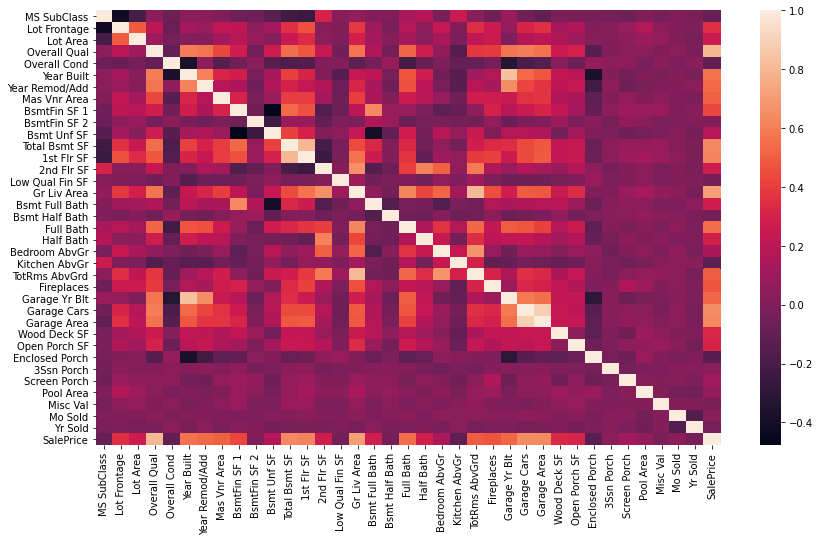

In [6]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr())

In [7]:
column = df.corr().loc['SalePrice'].sort_values().tail(10).index

In [8]:
#for i in column:
    #sns.scatterplot(x=i,y='SalePrice',data=df)
    #plt.show()

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

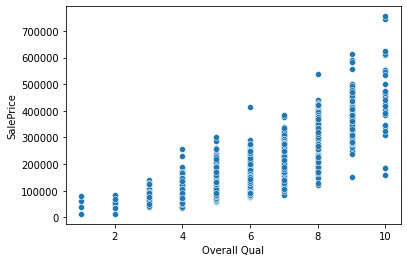

In [9]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

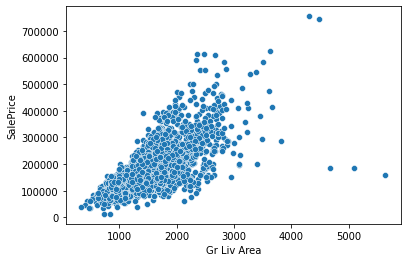

In [10]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

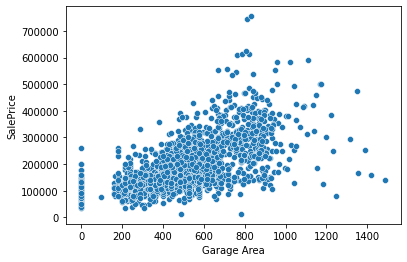

In [11]:
sns.scatterplot(x='Garage Area',y='SalePrice',data=df)

# We need to remove these three outliers

In [12]:
df[(df['SalePrice']<=300000) & (df['Gr Liv Area']>=4000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
drop_index = df[(df['SalePrice']<=300000) & (df['Gr Liv Area']>=4000)].index

In [14]:
df.drop(drop_index,axis=0, inplace=True)

In [15]:
#for i in column:
    #sns.scatterplot(x=i,y='SalePrice',data=df)
    #plt.show()


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

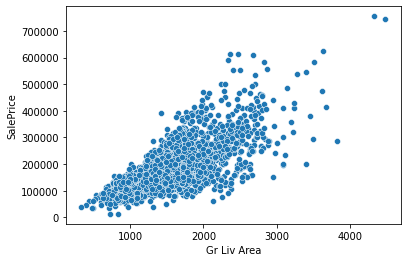

In [16]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

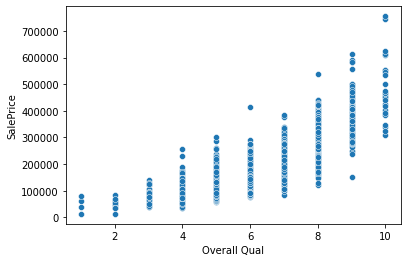

In [17]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

#  All outliers are removed
# Now we are dealing with missing data

In [18]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [19]:
100* df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [20]:
df.shape

(2927, 80)

In [21]:
def percentage_plot(df):
    percentage_nan = 100* df.isnull().sum() / len(df)
    percentage_nan = percentage_nan[percentage_nan>0].sort_values()
    return percentage_nan
def show_plot():
    percentage_nan = percentage_plot(df)
    plt.figure(figsize=(10,6))
    sns.barplot(x=percentage_nan.index, y= percentage_nan)
    plt.xticks(rotation=90)
    plt.show()

In [22]:
percentage_nan = percentage_plot(df)

In [23]:
percentage_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

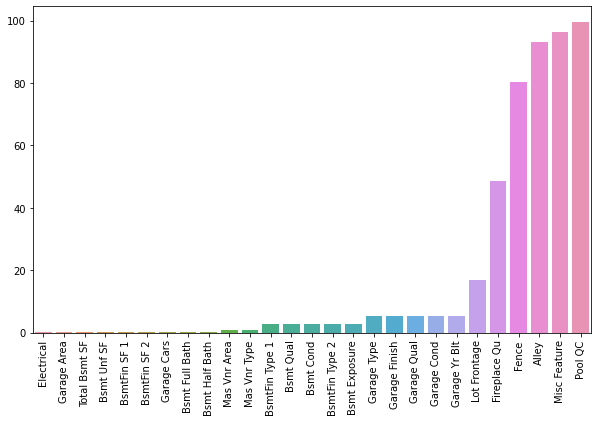

In [24]:
show_plot()

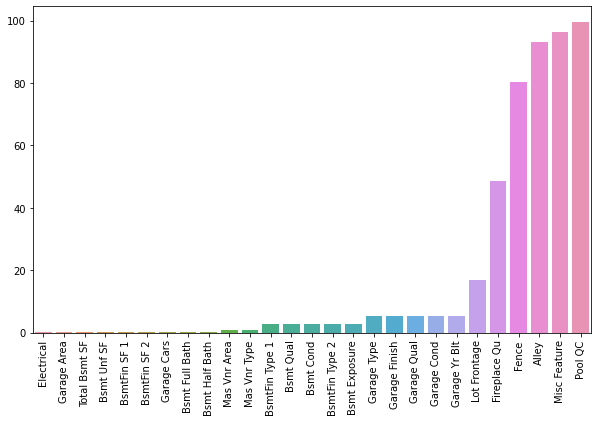

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=percentage_nan.index, y= percentage_nan)
plt.xticks(rotation=90)
plt.show()

In [26]:
percentage_nan[percentage_nan<=1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

# If % nan is less than 1 deal with the data by rows, drop the rows if not needed or fill them with appropriate values


# Electrical and Garage Area


In [27]:
df[df['Electrical'].isnull()].index

Int64Index([1577], dtype='int64')

In [28]:
df.drop(df[df['Electrical'].isnull()].index,axis=0,inplace=True)

In [29]:
df[df['Garage Area'].isnull()].index

Int64Index([2236], dtype='int64')

In [30]:
df.drop(df[df['Garage Area'].isnull()].index,axis=0,inplace=True)

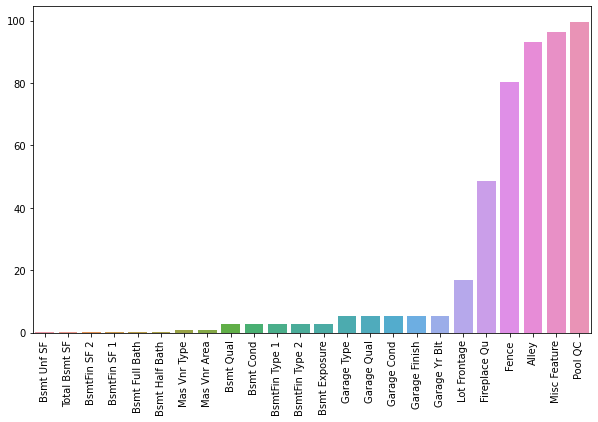

In [31]:
show_plot()

In [32]:
percentage_nan[percentage_nan<=1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

# Basement


In [33]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [34]:
df_nums.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [35]:
df_objs.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [36]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [37]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

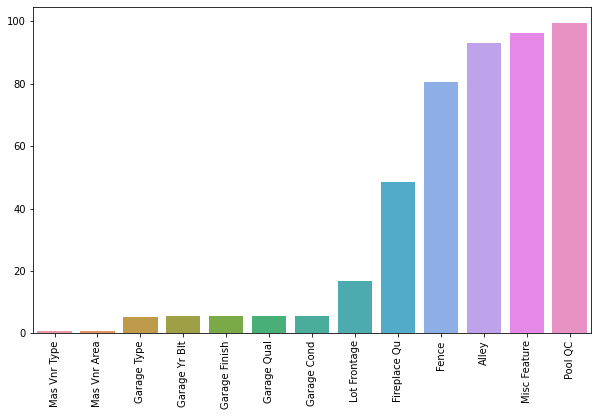

In [38]:
show_plot()

# MAS VNR

In [39]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [40]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

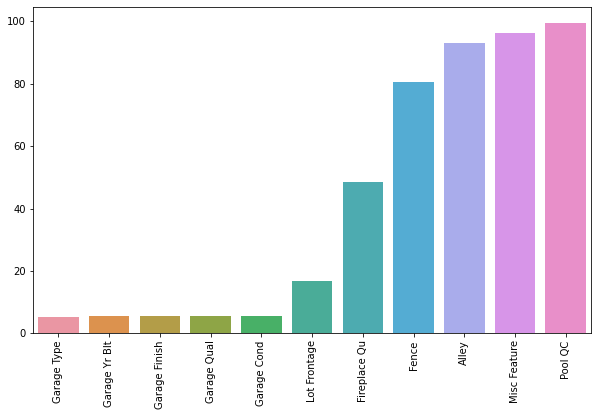

In [41]:
show_plot()

# Now we succesfully removed null values from columns having less than 1% missing data

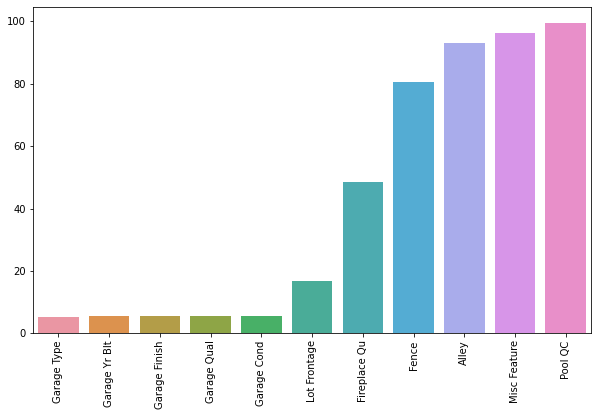

In [42]:
show_plot()

In [43]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)
# as more % of data is missing in these columns

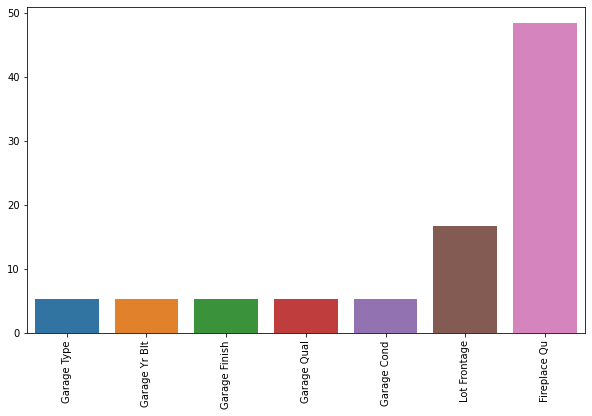

In [44]:
show_plot()

In [45]:
Garage_categorical = ['Garage Type', 'Garage Finish', 'Garage Qual','Garage Cond']
df[Garage_categorical] = df[Garage_categorical].fillna('None')

In [46]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

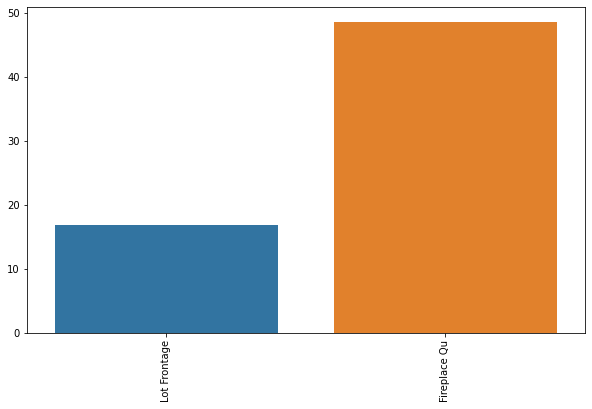

In [47]:
show_plot()

In [48]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

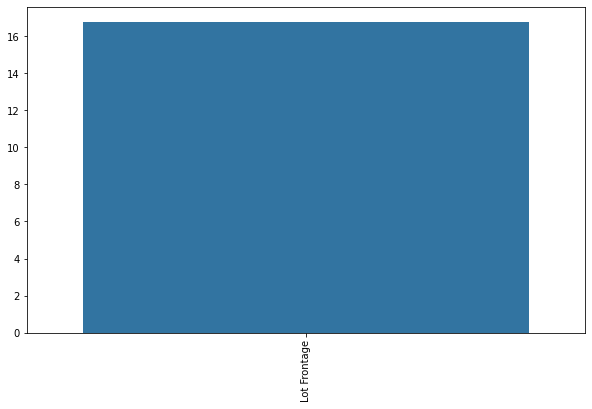

In [49]:
show_plot()

In [50]:
l = df.groupby('Neighborhood')['Lot Frontage'].mean()
l

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [51]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

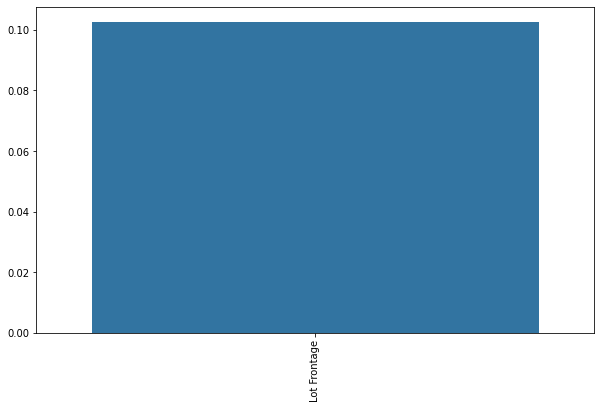

In [52]:
show_plot()

In [53]:
df.dropna(inplace=True)

<AxesSubplot:>

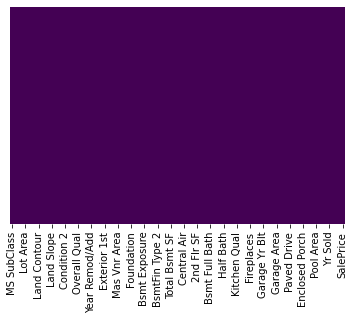

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# No null values now let's deal with categorical data by creating dummy variables

In [55]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [56]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [57]:
df = pd.concat([df_nums,df_objs],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 2929
Columns: 258 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(11), int64(26), uint8(221)
memory usage: 1.5 MB


Now we completed feature engineering and completed our final data set, now it's time to move on to linear regression

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x = df.drop('SalePrice',axis=1)

In [61]:
y = df['SalePrice']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [63]:
#from sklearn.preprocessing import StandardScaler

In [64]:
#scaler = StandardScaler()

In [65]:
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

# Now let's use linear regression from scikit-learn

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
linear_model = LinearRegression()

In [68]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [69]:
linear_model.coef_

array([-7.05077216e+01,  1.99566690e+01,  7.04987043e-01,  6.69817430e+03,
        5.41408149e+03,  3.49590771e+02,  9.64625282e+01,  2.62542768e+01,
        1.57109180e+01,  1.17983657e+01, -4.15345363e+00,  2.33558375e+01,
        1.48009917e+01,  2.68485093e+01,  1.52379014e-01,  4.18018722e+01,
        1.77865898e+03, -2.23517808e+03,  3.15802139e+03,  1.47272337e+03,
       -3.54666310e+03, -1.10858549e+04, -4.71226158e+02,  3.44994010e+03,
        5.52141954e+01,  2.86856445e+03,  1.60390043e+01,  1.41125586e+01,
       -9.96315485e-01,  7.83285783e-01, -1.39839588e+01,  4.90187663e+01,
        6.64061827e+01,  6.55391848e-01, -8.14981603e+01, -7.46203593e+02,
       -1.99560585e+03,  1.02712107e+04,  7.60407341e+03,  1.38463040e+04,
        7.74411866e+03,  1.80165368e+03,  2.84485319e+04,  2.09213248e+03,
       -4.90204304e+03,  1.88673894e+03,  1.56308369e+03, -1.13185936e+04,
       -2.63580862e+03, -1.36612667e+04, -4.27119847e+04,  5.11231485e+03,
       -3.26102103e+03, -

In [70]:
predictions = linear_model.predict(x_test)

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [72]:
mae = mean_absolute_error(y_test,predictions)
mae

15145.034187228324

In [73]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
rmse

22609.912546901684

In [74]:
r2 = r2_score(y_test,predictions)
r2

0.9211579596354116

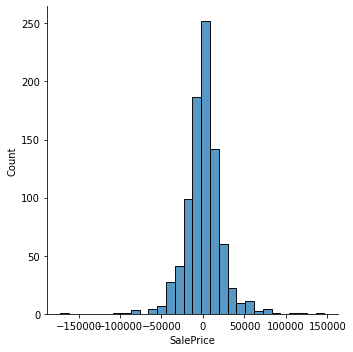

In [75]:
sns.displot(y_test-predictions, bins=30)

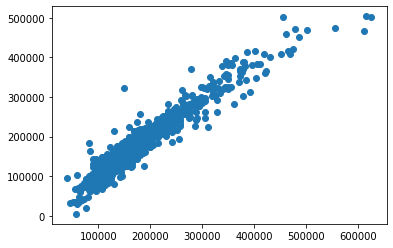

In [76]:
plt.scatter(y_test,predictions)

# Now let's use Elastic net regularization

In [77]:
from sklearn.linear_model import ElasticNetCV

In [78]:
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],n_alphas=100,max_iter=100000,eps=0.0000001)

In [79]:
elastic_model.fit(x_train,y_train)

ElasticNetCV(eps=1e-07, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=100000)

In [80]:
elastic_model.l1_ratio_

1.0

In [81]:
elastic_model.alpha_

42.210854025107444

In [82]:
elastic_model.coef_

array([-1.20713201e+02, -3.85467464e+00,  5.37380620e-01,  8.09044622e+03,
        5.75166523e+03,  3.81783465e+02,  1.25365649e+02,  2.94564762e+01,
        3.01000161e+01,  2.47173908e+01,  1.15228617e+01,  8.40344077e+00,
        4.74332443e+01,  5.47711451e+01,  1.64980446e+01,  9.30910951e+00,
        1.27514382e+03, -2.98028606e+03,  3.07494724e+03,  8.22137641e+02,
       -4.93030619e+03, -8.88002797e+03, -2.36168418e+01,  3.28523603e+03,
       -5.83913297e+00,  1.97069080e+03,  2.24528857e+01,  1.68066811e+01,
        1.27727552e+00,  3.33135160e+00, -8.09942518e+00,  4.87789311e+01,
        6.87485370e+01,  2.91985994e-02, -8.72429606e+01, -6.07971280e+02,
       -3.05346606e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.31597744e+02, -4.21868360e+03,  9.28700530e+03,  1.37759892e+03,
       -0.00000000e+00,  1.40882577e+03,  3.25020076e+03, -6.12548880e+03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  4.88189429e+03,
       -2.05881278e+03, -

In [83]:
predictions = elastic_model.predict(x_test)

In [84]:
mae = mean_absolute_error(y_test,predictions)
mae

14738.7072552044

In [85]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
rmse

21673.328740993085

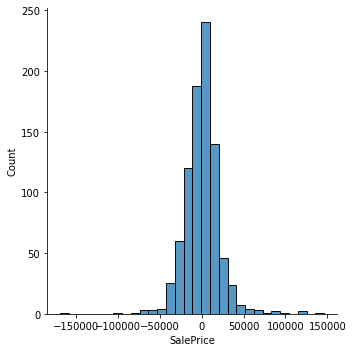

In [86]:
sns.displot(y_test-predictions, bins=30)

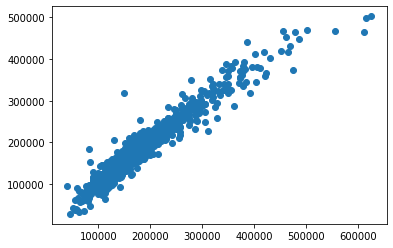

In [87]:
plt.scatter(y_test,predictions)

In [88]:
r2 = r2_score(y_test,predictions)
r2

0.9275545145912666